In [133]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import torch
from numpy import random as rand
import torchio as tio
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from typing import Union, Tuple, List
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from Image_Functions import slicing, crop_images_to_brain
from datasetModule import Set
from Model import CNN

In [136]:
"Need to specify the local path on computer"
dir_path = "../Task3/"

In [ ]:
X_train, X_test = train_test_split(Set(dir_path), test_size=0.3, random_state=25)

In [ ]:

X_train_temp = crop_images_to_brain(X_train)
X_test_temp = crop_images_to_brain(X_test)

In [ ]:
for i in range(len(X_train_temp)):
    for i in range(3):
        img = X_train_temp[i]['data'][0]
        img = img.float()
        slicing(img)

In [124]:
train_set, test_set = DataLoader(X_train_temp, batch_size=2), DataLoader(X_test_temp, batch_size=1)

In [122]:
for elm in X_train_temp:
    print(elm['data'].shape)

torch.Size([3, 269, 322, 173])
torch.Size([3, 269, 322, 173])
torch.Size([3, 269, 322, 173])
torch.Size([3, 269, 322, 173])
torch.Size([3, 269, 322, 173])
torch.Size([3, 269, 322, 173])


In [125]:
tmp = next(iter(train_set))
image = tmp['data']
print(image.shape)
print(type(image))

torch.Size([2, 3, 269, 322, 173])
<class 'torch.Tensor'>


In [131]:

model = CNN()
out_img = model(image)
print(out_img.shape)

1st convolution
torch.Size([2, 16, 269, 322, 173])
torch.Size([2, 32, 269, 322, 173])


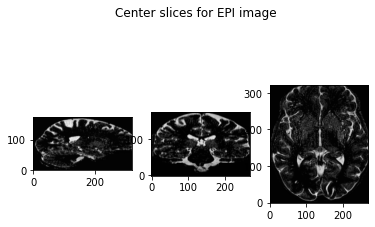

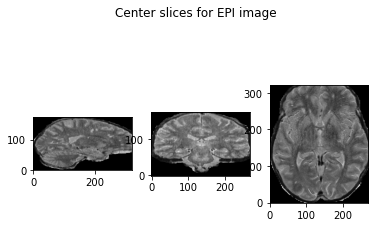

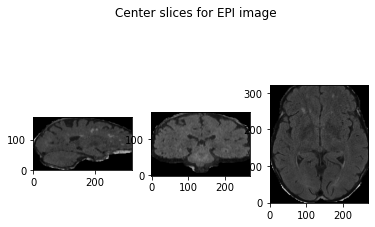

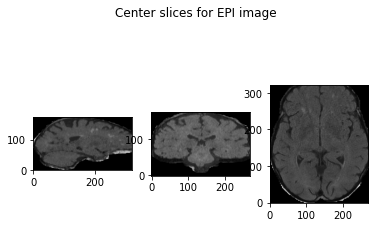

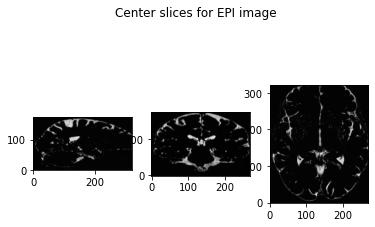

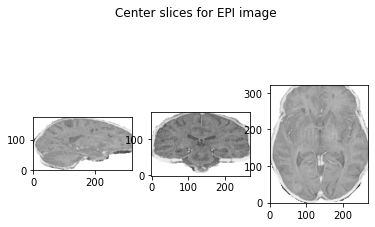

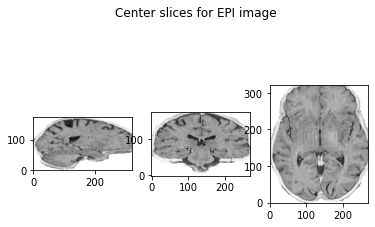

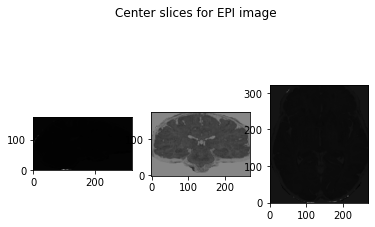

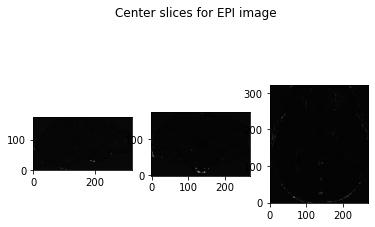

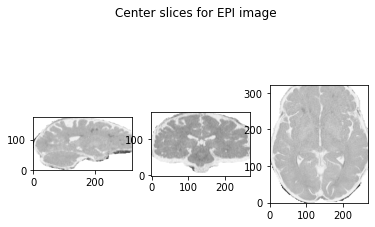

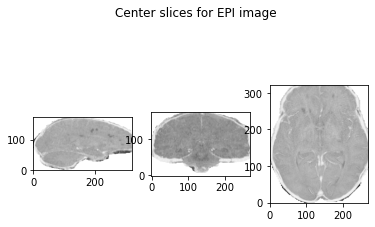

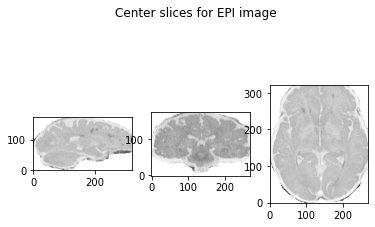

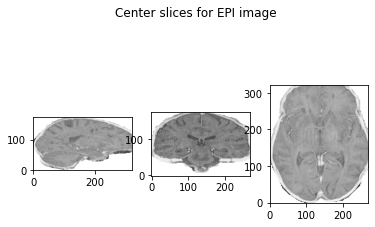

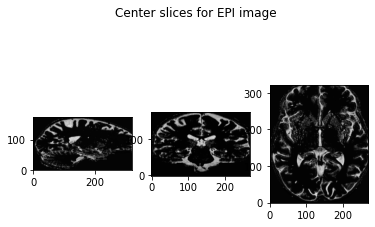

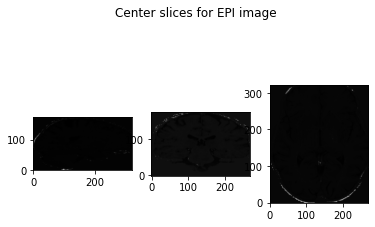

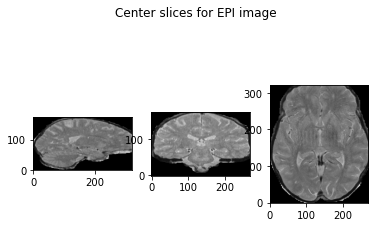

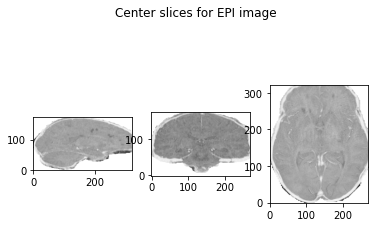

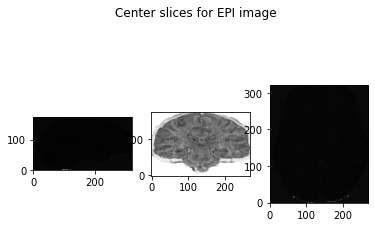

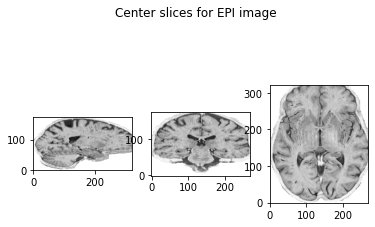

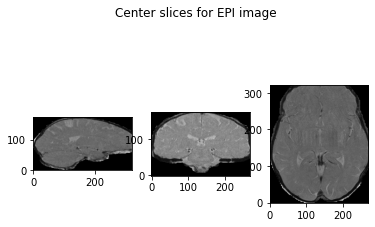

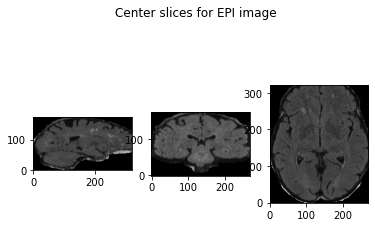

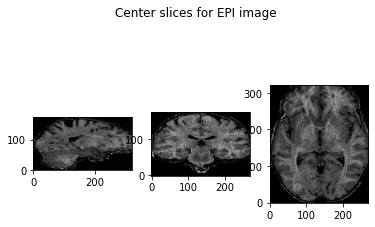

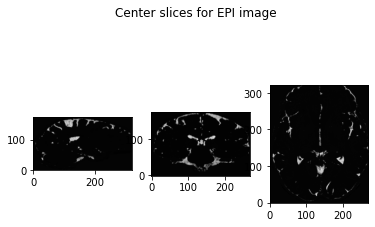

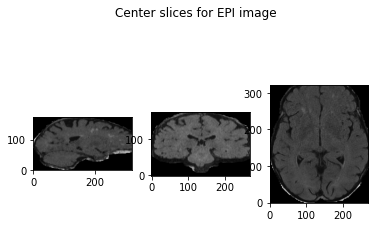

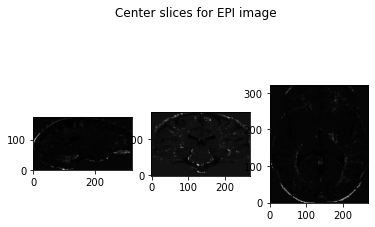

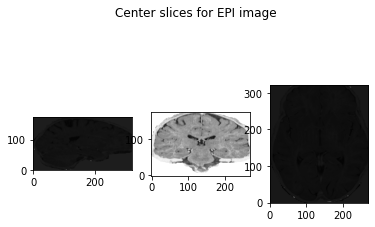

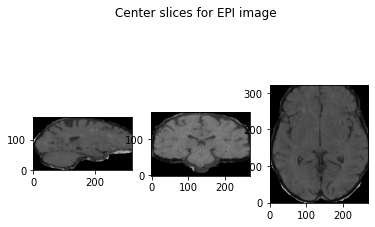

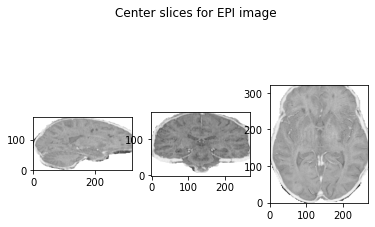

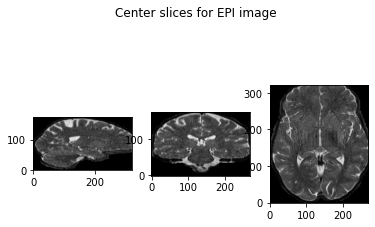

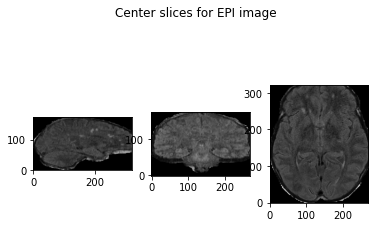

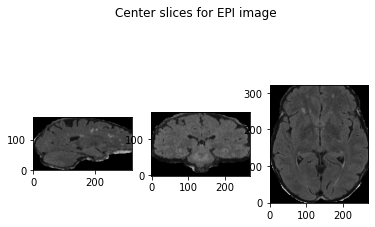

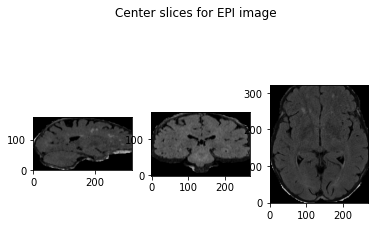

In [132]:
img_arr = out_img.detach().numpy()
for i in range(len(img_arr[0])):
    slicing(img_arr[0][i])